<a href="https://colab.research.google.com/github/giorginolab/GSN-Tutorial-BCN-2020/blob/master/GSN_Tutorial_BCN_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MD analysis: Gelsolin WT/mutant, apo/nanobody example 
## MSI course, Master in Bioinformatics for Health Sciences, UPF
*Toni Giorgino, IBF-CNR, Italy* - www.giorginolab.it

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Pt9gGqiGtrA9_5VRr4J7h3D_WLrBK4k8)

This is a Python notebook, based on Google Colaboratory platform. For an introduction to the platform, see [here](https://colab.research.google.com/notebooks/welcome.ipynb). You will be able to edit Python statements on this notebook by entering them into "cells", and execute them with the "play" button.

Notes:
 * The order of execution matters, not the order of display. 
 * To start from scratch, restart the runtime. 
 * Shell commands: prefix with an ! symbol.  E.g. `!ls -l` lists the contents of the current directory.
 * If you don't have a Google account, you may copy-paste the  statements in  local Python installations.
 * To plot, see examples [here](https://colab.research.google.com/notebooks/charts.ipynb).

The class is based on the following paper:

> Giorgino T, Analysis libraries for molecular trajectories: a cross-language synopsis. Chapter 20 in:  Biomolecular Simulations: Methods and Protocols Edited by M. Bonomi and C. Camilloni (Springer, ISBN 978-1-4939-9608-7).  [Preprint here](https://github.com/giorginolab/preprints-repository/tree/master/analysis_libraries_chapter)

and on the biological example from:

> Giorgino T, Mattioni D, Hassan A, Milani M, Mastrangelo E, Barbiroli A, et al. Nanobody interaction unveils structure, dynamics and proteotoxicity of the Finnish-type amyloidogenic gelsolin variant. Biochimica et Biophysica Acta (BBA) - Molecular Basis of Disease. 2019 Mar 1;1865(3):648–60. [Journal version](https://www.sciencedirect.com/science/article/pii/S0925443919300109?via%3Dihub). [Preprint here](https://arxiv.org/abs/1903.07308).





# Retrieve simulation trajectories

This copies data on the server which is running the calculations (not your computer). See below to download files to your PC.

In [1]:
#@title Default title text
# Get the data files
! git clone https://github.com/giorginolab/GSN-Tutorial-BCN-2020.git

Cloning into 'GSN-Tutorial-BCN-2020'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 18 (delta 5), reused 15 (delta 5), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [3]:
%cd /content/GSN-Tutorial-BCN-2020/data

/content/GSN-Tutorial-BCN-2020/data


In [8]:
!ls -l

total 66816
-rw-r--r-- 1 root root  3505896 Apr 23 08:03 D187N+Nb-run.pdb
-rw-r--r-- 1 root root  4938249 Apr 23 08:03 D187N+Nb-run.psf
-rw-r--r-- 1 root root  9578580 Apr 23 08:03 D187N+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 Apr 23 08:03 D187N-run.pdb
-rw-r--r-- 1 root root  2877716 Apr 23 08:03 D187N-run.psf
-rw-r--r-- 1 root root  8284912 Apr 23 08:03 D187N-run-subset.xtc
-rw-r--r-- 1 root root  3505653 Apr 23 08:03 WT+Nb-run.pdb
-rw-r--r-- 1 root root  4937615 Apr 23 08:03 WT+Nb-run.psf
-rw-r--r-- 1 root root 14860688 Apr 23 08:03 WT+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 Apr 23 08:03 WT-run.pdb
-rw-r--r-- 1 root root  2877395 Apr 23 08:03 WT-run.psf
-rw-r--r-- 1 root root  8856064 Apr 23 08:03 WT-run-subset.xtc


# Download results to your PC

To download any file (not necessary, but may be useful to inspect results), use this...

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

# Install Python libraries

In [10]:
# !pip install mdtraj
# !pip install mdanalysis
!pip install moleculekit


     |████████████████████████████████| 911kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.3-cp36-cp36m-linux_x86_64.whl size=5584750 sha256=bc3e2ef64d9afe7b5424c7de12df9ed845a20515b2136a11dad290c9ff25a55b
  Stored in directory: /root/.cache/pip/wheels/7d/b5/5b/a11d3ec14d2921175986eacba4e5fb9d87fb545b4586de3dfd
Successfully built mdtraj


# Analysis starts here

We will make use of Python (and its Numpy library) functions to answer a series of questions. Access to the molecular properties will use the Moleculekit functions ([manual](https://software.acellera.com/docs/latest/moleculekit/index.html)).  

Rewriting them in one of the other libraries and languages may be an useful exercise.

In [0]:
#import MDAnalysis as mda
import moleculekit as mk
import numpy as np
import matplotlib.pyplot as plt
from moleculekit.molecule import Molecule

In [0]:
# The file set we plan to analyze. In this case it may be WT, WT+Nb, 
# D187N, D187N+Nb .

pdb="WT+Nb-run.pdb"
xtc="WT+Nb-run-subset.xtc"

# psf="WT+Nb-run.psf"  # but we don't use this one


In [0]:
m=Molecule(pdb)

In [0]:
m

In [41]:
m.read(xtc)
m

Molecule with 43279 atoms and 80 frames
Atom field - altloc shape: (43279,)
Atom field - atomtype shape: (43279,)
Atom field - beta shape: (43279,)
Atom field - chain shape: (43279,)
Atom field - charge shape: (43279,)
Atom field - coords shape: (43279, 3, 80)
Atom field - element shape: (43279,)
Atom field - insertion shape: (43279,)
Atom field - masses shape: (43279,)
Atom field - name shape: (43279,)
Atom field - occupancy shape: (43279,)
Atom field - record shape: (43279,)
Atom field - resid shape: (43279,)
Atom field - resname shape: (43279,)
Atom field - segid shape: (43279,)
Atom field - serial shape: (43279,)
angles shape: (0, 3)
bonds shape: (0, 2)
bondtype shape: (0,)
box shape: (3, 80)
boxangles shape: (3, 80)
crystalinfo: {}
dihedrals shape: (0, 4)
fileloc shape: (80, 2)
impropers shape: (0, 4)
reps: 
ssbonds shape: (0,)
step shape: (80,)
time shape: (80,)
topoloc: /content/GSN-Tutorial-BCN-2020/data/WT+Nb-run.pdb
viewname: WT+Nb-run.pdb

# Exercises

Write code to answer the following questions

## How many chains are there? 

Note that these are simulation structures, and may use chains for different purposes than crystallographic structures.

In [24]:
# Write and test your answer here

np.unique(m.chain)

array(['B', 'D', 'I', 'W'], dtype=object)

## How many residues per each chain?

In [31]:
for ch in np.unique(m.chain):
  tmp = m.copy()
  tmp.filter(f"protein and chain {ch} and name CA")
  nres = tmp.numAtoms
  print(f"Chain {ch} has {nres} residues (CA atoms)")

Chain B has 126 residues (CA atoms)
Chain D has 102 residues (CA atoms)
Chain I has 0 residues (CA atoms)
Chain W has 0 residues (CA atoms)


In [32]:
# Alternative (non-destructive) implementation
for ch in np.unique(m.chain):
  asel=m.atomselect(f"protein and chain {ch} and name CA")
  nres = np.sum(asel)
  print(f"Chain {ch} has {nres} residues (CA atoms)")

Chain B has 126 residues (CA atoms)
Chain D has 102 residues (CA atoms)
Chain I has 0 residues (CA atoms)
Chain W has 0 residues (CA atoms)


## How many atoms?

In [29]:
for ch in np.unique(m.chain):
  tmp = m.copy()
  tmp.filter(f"protein and chain {ch}")
  nat = tmp.numAtoms
  print(f"Chain {ch} has {nat} atoms")

2020-04-23 14:37:32,855 - moleculekit.molecule - INFO - Removed 41407 atoms. 1872 atoms remaining in the molecule.


Chain B has 1872 atoms


2020-04-23 14:37:33,842 - moleculekit.molecule - INFO - Removed 41689 atoms. 1590 atoms remaining in the molecule.


Chain D has 1590 atoms


2020-04-23 14:37:34,819 - moleculekit.molecule - INFO - Removed 43279 atoms. 0 atoms remaining in the molecule.


Chain I has 0 atoms


2020-04-23 14:37:35,792 - moleculekit.molecule - INFO - Removed 43279 atoms. 0 atoms remaining in the molecule.


Chain W has 0 atoms


## Is your structure solvated? If so, remove solvent.

In [42]:
nwat = np.sum(m.atomselect("water"))
print(nwat)

m_nowater = m.copy()
m_nowater.filter("not water")

39759


2020-04-23 14:45:22,890 - moleculekit.molecule - INFO - Removed 39759 atoms. 3520 atoms remaining in the molecule.


array([ 1872,  1873,  1874, ..., 43219, 43220, 43221], dtype=int32)

## How many frames? How many nanoseconds?

In [36]:
nf = m.numFrames
print(f"There are {nf} frames")

There are 80 frames


## Count how many species of ions and how many of each

In [43]:
ions = m_nowater.copy()
ions.filter("ions")
ions.name

2020-04-23 14:45:37,699 - moleculekit.molecule - INFO - Removed 3462 atoms. 58 atoms remaining in the molecule.


array(['CAL', 'CAL', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA',
       'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA',
       'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA',
       'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'SOD', 'SOD', 'SOD',
       'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD',
       'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD',
       'SOD', 'SOD', 'SOD', 'SOD'], dtype=object)

In [54]:
for i in np.unique(ions.name):
  ni = sum(ions.atomselect(f"name {i}"))
  print(f"Ion {i} has {ni} atoms")

# Alternatively: np.unique(ions.name, return_counts=True)

Ion CAL has 2 atoms
Ion CLA has 31 atoms
Ion SOD has 25 atoms


Now keep only chain D and align to its frame 0

In [69]:
md = m.copy()
md.filter("protein and chain D and name CA")


2020-04-23 15:54:49,506 - moleculekit.molecule - INFO - Removed 43177 atoms. 102 atoms remaining in the molecule.


array([    0,     1,     2, ..., 43276, 43277, 43278], dtype=int32)

## Align to the G2's first frame

In [0]:
md.align("name CA")

# In case you want to inspect
md.write("check.pdb")
md.write("check.xtc")

## Inspect the shape of the coordinates. 

They are organized as follows: atoms x [xyz] x frames

In [72]:
md.coords.shape

(102, 3, 80)

## Compute backbone global RMSD(t) 

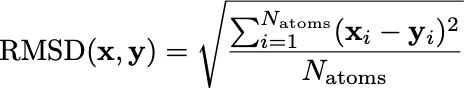

In [79]:
T = md.numFrames
N = md.numAtoms # CA only: 1 atom = 1 residue

rmsdT = np.zeros((T))
X = md.coords[:,:,0]  # First frame, all axes, all atoms

for t in range(T):
  Y = md.coords[:,:,t]  # Frame at t, all axes, all atoms
  d2 = (X-Y)**2   # This is still a matrix
  sd2 = np.sum(d2)/N
  rmsdT[t]=np.sqrt(sd2)

print(rmsdT)

[0.         0.82842946 1.05544773 0.93853878 1.08333973 1.30272074
 1.11527914 0.93128822 0.96388051 0.98519583 1.353881   1.24414072
 1.37935483 1.22356928 1.42647068 1.16690134 1.23553916 1.19546493
 1.20277102 1.02297115 1.25717569 1.16625664 1.27760951 1.0851937
 1.00021562 1.01993867 1.01860151 1.05558942 0.98216355 1.25240403
 1.21906382 1.24838536 1.15900866 1.09457693 1.16679358 0.94538561
 0.99107854 1.12425756 0.96595429 1.05542431 0.98756963 1.13863105
 1.30065842 1.05669856 1.19505366 1.11283672 1.21754712 1.20406445
 1.44376319 1.46410909 1.19801261 1.33287811 1.15781186 1.20199547
 1.10337311 1.05041815 1.16629993 1.16994633 1.08975514 1.19704641
 1.27370167 1.01386485 1.24716355 1.58714828 1.54043483 1.57758525
 1.72665079 1.66481208 1.98547979 1.92099483 1.97054851 2.15665811
 1.72762772 1.86547154 1.95342315 1.88536329 1.29069592 1.54156787
 1.56915865 1.80288965]


Text(0, 0.5, 'Cα RMSD (Å)')

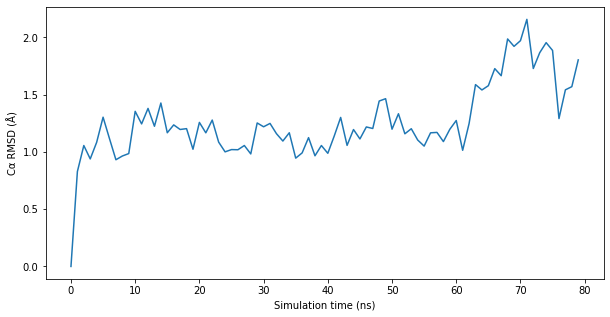

In [99]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(nF), rmsdT)
plt.xlabel("Simulation time (ns)")
plt.ylabel("Cα RMSD (Å)")

2020-04-23 17:52:57,171 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2020-04-23 17:52:57,450 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 3520 atoms. Ignore this message if you believe this is accurate, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.


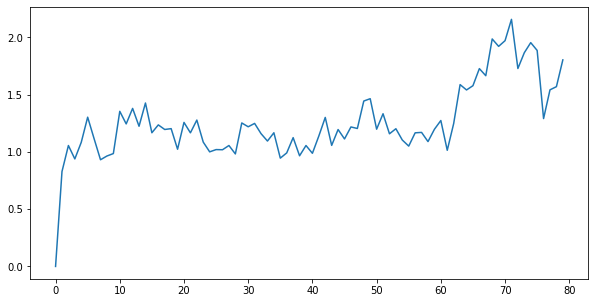

In [138]:
# This is an alternative implementation which uses moleculekit "projection" functions

from moleculekit.projections.metricrmsd import *
rmsdT_alt=MetricRmsd(m_nowater,"chain D and protein and name CA").project(m_nowater)

plt.figure(figsize=(10,5))
plt.plot(rmsdT_alt)

## Compute displacements *by residue and time*.

In [87]:
rmsdRT = np.zeros((T,N))

for i in range(N):
  Xi = md.coords[i,:,0] # First frame, all axes, atom i
  for t in range(T):
    Yi = md.coords[i,:,t]  # Time t, atom i, 3D vector
    dist = np.sum((Xi-Yi)**2)   # Displacement^2
    rmsdRT[t,i]=np.sqrt(dist)

print(rmsdRT)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.28160989 0.59918141 0.38234124 ... 0.52257681 0.40604314 4.29861116]
 [0.82344401 0.85070413 0.7097652  ... 0.71579552 1.5872221  4.48131752]
 ...
 [0.64173472 0.60052192 0.42412972 ... 1.14602804 1.02019465 3.03136039]
 [0.65047789 0.33448276 0.51247442 ... 1.06225049 1.14258277 4.68605232]
 [0.53484368 0.48602217 0.41788647 ... 0.60190225 1.12839973 2.25673652]]


Text(0.5, 0, 'Time (ns)')

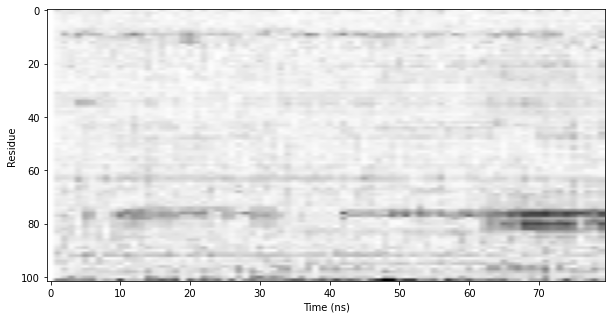

In [95]:
plt.figure(figsize=(10,5))
plt.imshow(rmsdRT.T, aspect="auto", cmap="binary")
plt.ylabel("Residue")
plt.xlabel("Time (ns)")

## Average over time

Text(0, 0.5, 'Mean displacement (A)')

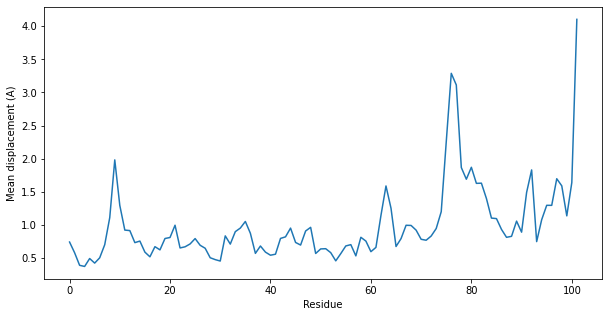

In [140]:
plt.figure(figsize=(10,5))
rmsdR = np.mean(rmsdRT,axis = 0) # <-- note: mean over axis 0, which is time
plt.plot(np.arange(N), rmsdR)
plt.xlabel("Residue")
plt.ylabel("Mean displacement (A)")

2020-04-23 18:07:07,412 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 3520 atoms. Ignore this message if you believe this is accurate, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
2020-04-23 18:07:07,721 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 3520 atoms. Ignore this message if you believe this is accurate, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.


Text(0.5, 0, 'Time (ns)')

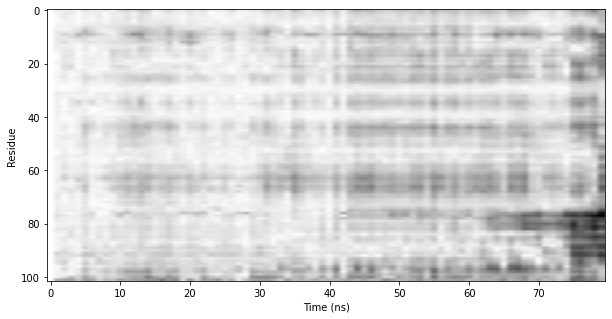

In [141]:
# Alternative implementation using projections

from moleculekit.projections.metricfluctuation import *

m_nowater_fr0 = m_nowater.copy()
m_nowater_fr0.dropFrames(keep=0)
rmsdRT_alt=MetricFluctuation("chain D and protein and name CA", refmol=m_nowater_fr0).project(m_nowater)

plt.figure(figsize=(10,5))
plt.imshow(np.sqrt(rmsdRT_alt.T), aspect="auto", cmap="binary")
plt.ylabel("Residue")
plt.xlabel("Time (ns)")
